In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import ConnectionPatch
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import graphviz
from sklearn.svm import SVC

B1: thu thập dữ liệu

In [2]:
data = pd.read_csv('data.csv')
data.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

In [3]:
data = data.drop('id',axis = 1)

B2: Chuẩn hóa dữ liệu

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [5]:
data['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [6]:
data['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [7]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
data.describe(include="object")

gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892

In [9]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
data.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000

In [11]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
data.head(10)


gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   
5    Male  81.0             0              0          Yes        Private   
6    Male  74.0             1              1          Yes        Private   
7  Female  69.0             0              0           No        Private   
8  Female  59.0             0              0          Yes        Private   
9  Female  78.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0          Urban             228.69  36.600000  formerly smoked       1  
1          Rural             202.21  28.893237     never smoked       1  
2          Rural             105.92  32.500000     never smoked       1  
3          Urban             171.23  34.400000           smokes       1  
4          Rural             174.12  24.000000     never smoked       1  
5          Urban             186.21  29.000000  formerly smoked       1  
6          Rural              70.09  27.400000     never smoked       1  
7          Urban              94.39  22.800000     never smoked       1  
8          Rural              76.15  28.893237          Unknown       1  
9          Urban              58.57  24.200000          Unknown       1

In [12]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

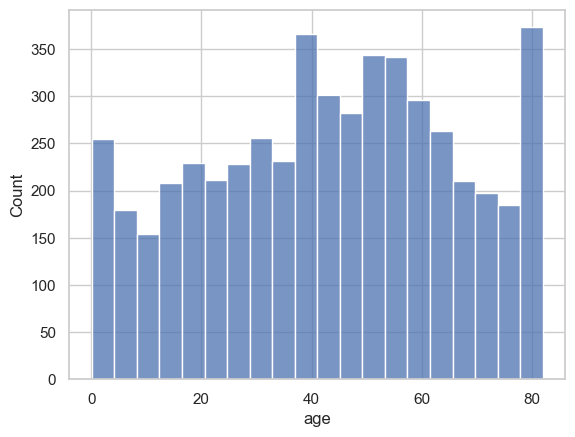

In [13]:
sns.set_theme(style="whitegrid")
sns.histplot(data=data, x="age")
plt.show()

In [14]:
data2 = data.copy();
data2.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0          Urban             228.69  36.600000  formerly smoked       1  
1          Rural             202.21  28.893237     never smoked       1  
2          Rural             105.92  32.500000     never smoked       1  
3          Urban             171.23  34.400000           smokes       1  
4          Rural             174.12  24.000000     never smoked       1

In [15]:
column_mapping = {
    'id': 'id',
    'gender': 'Giới Tính',
    'age': 'Tuổi',
    'hypertension': 'Huyết Áp',
    'heart_disease': 'Bệnh Tim',
    'ever_married': 'Lập Gia Đình',
    'work_type': 'Công Việc',
    'Residence_type': 'Loại Cư Trú',
    'avg_glucose_level': 'Glucose Trung Bình',
    'bmi': 'Chỉ Số Khối',
    'smoking_status': 'Hút Thuốc',
    'stroke': 'Đột Quỵ',
}

# Sử dụng hàm rename để đổi tên các cột
data2 = data.rename(columns=column_mapping)

data2['Giới Tính'] = data2['Giới Tính'].replace({'Male': 'Nam', 'Female': 'Nữ','Other': 'Khác'})
data2['Huyết Áp'] = data2['Huyết Áp'].replace({0: 'Không', 1: 'Có'})
data2['Bệnh Tim'] = data2['Bệnh Tim'].replace({0: 'Không', 1: 'Có'})
data2['Loại Cư Trú'] = data2['Loại Cư Trú'].replace({'Urban': 'Đô thị', 'Rural': 'Nông Thôn'})
data2['Hút Thuốc'] = data2['Hút Thuốc'].replace({'formerly smoked': 'Đã Từng', 'never smoked': 'Không','smokes':'Có','Unknown':'Không Xác định'})
data2['Đột Quỵ'] = data2['Đột Quỵ'].replace({1: 'Có', 0: 'Không'})
data2['Lập Gia Đình'] = data2['Lập Gia Đình'].replace({'Yes': 'Có', 'No': 'Không'})



data2.head()

Giới Tính  Tuổi Huyết Áp Bệnh Tim Lập Gia Đình      Công Việc Loại Cư Trú  \
0       Nam  67.0    Không       Có           Có        Private      Đô thị   
1        Nữ  61.0    Không    Không           Có  Self-employed   Nông Thôn   
2       Nam  80.0    Không       Có           Có        Private   Nông Thôn   
3        Nữ  49.0    Không    Không           Có        Private      Đô thị   
4        Nữ  79.0       Có    Không           Có  Self-employed   Nông Thôn   

   Glucose Trung Bình  Chỉ Số Khối Hút Thuốc Đột Quỵ  
0              228.69    36.600000   Đã Từng      Có  
1              202.21    28.893237     Không      Có  
2              105.92    32.500000     Không      Có  
3              171.23    34.400000        Có      Có  
4              174.12    24.000000     Không      Có

In [16]:
categorical_attrs = ['Giới Tính', 'Huyết Áp', 'Bệnh Tim', 'Lập Gia Đình', 'Công Việc', 'Loại Cư Trú', 'Hút Thuốc', 'Đột Quỵ']

# Tạo biểu đồ tròn cho từng thuộc tính phân loại
for attr in categorical_attrs:
    counts = data2[attr].value_counts()
    fig = px.pie(names=counts.index, values=counts.values, title=f'Tỉ Lệ Của {attr}')
    fig.update_traces(textinfo='percent+label', hole=0.3)
    fig.show()

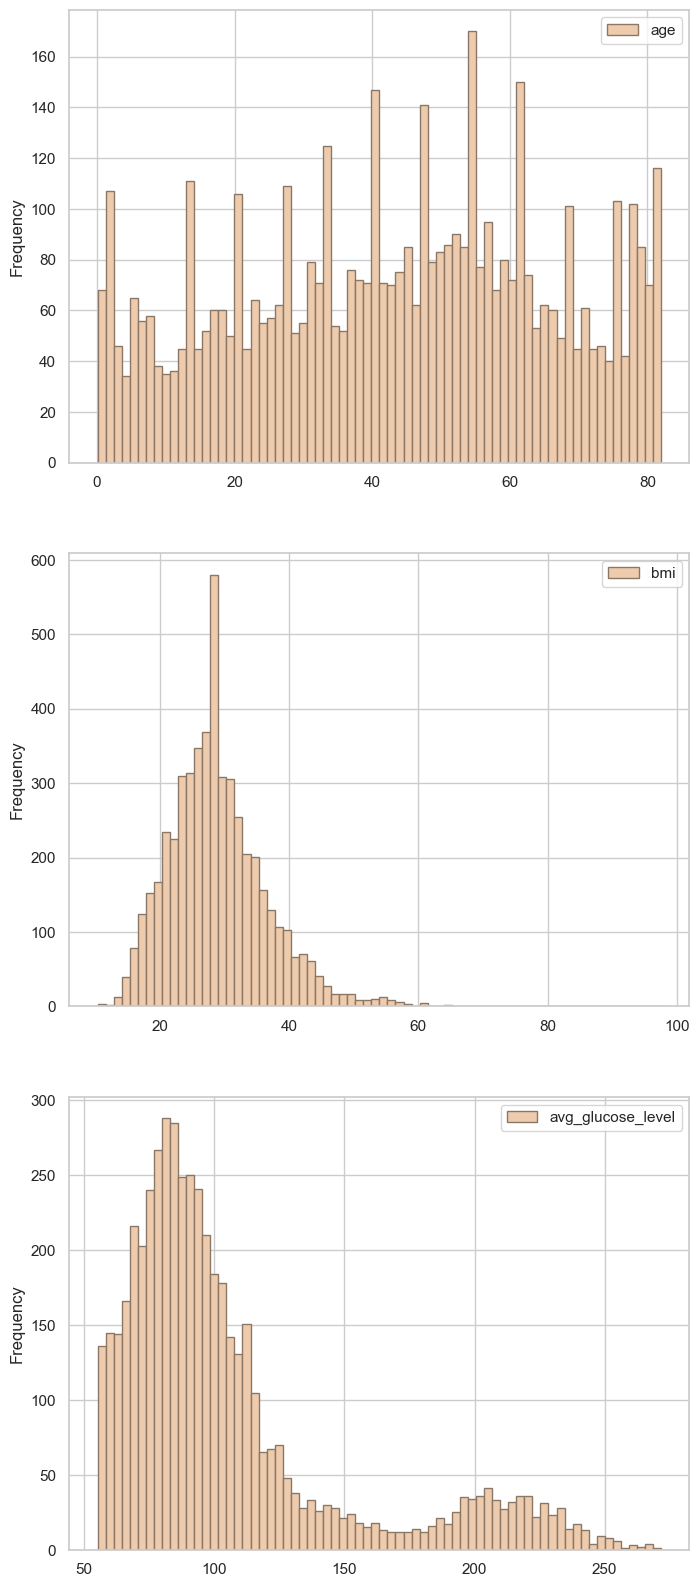

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 20))

data.plot(kind="hist", y="age", bins=70, edgecolor="#8B7765",color="#EECBAD", ax=axes[0])

data.plot(kind="hist", y="bmi", bins=70, edgecolor="#8B7765",color="#EECBAD", ax=axes[1])

data.plot(kind="hist", y="avg_glucose_level", bins=70, edgecolor="#8B7765",color="#EECBAD", ax=axes[2])

plt.show()

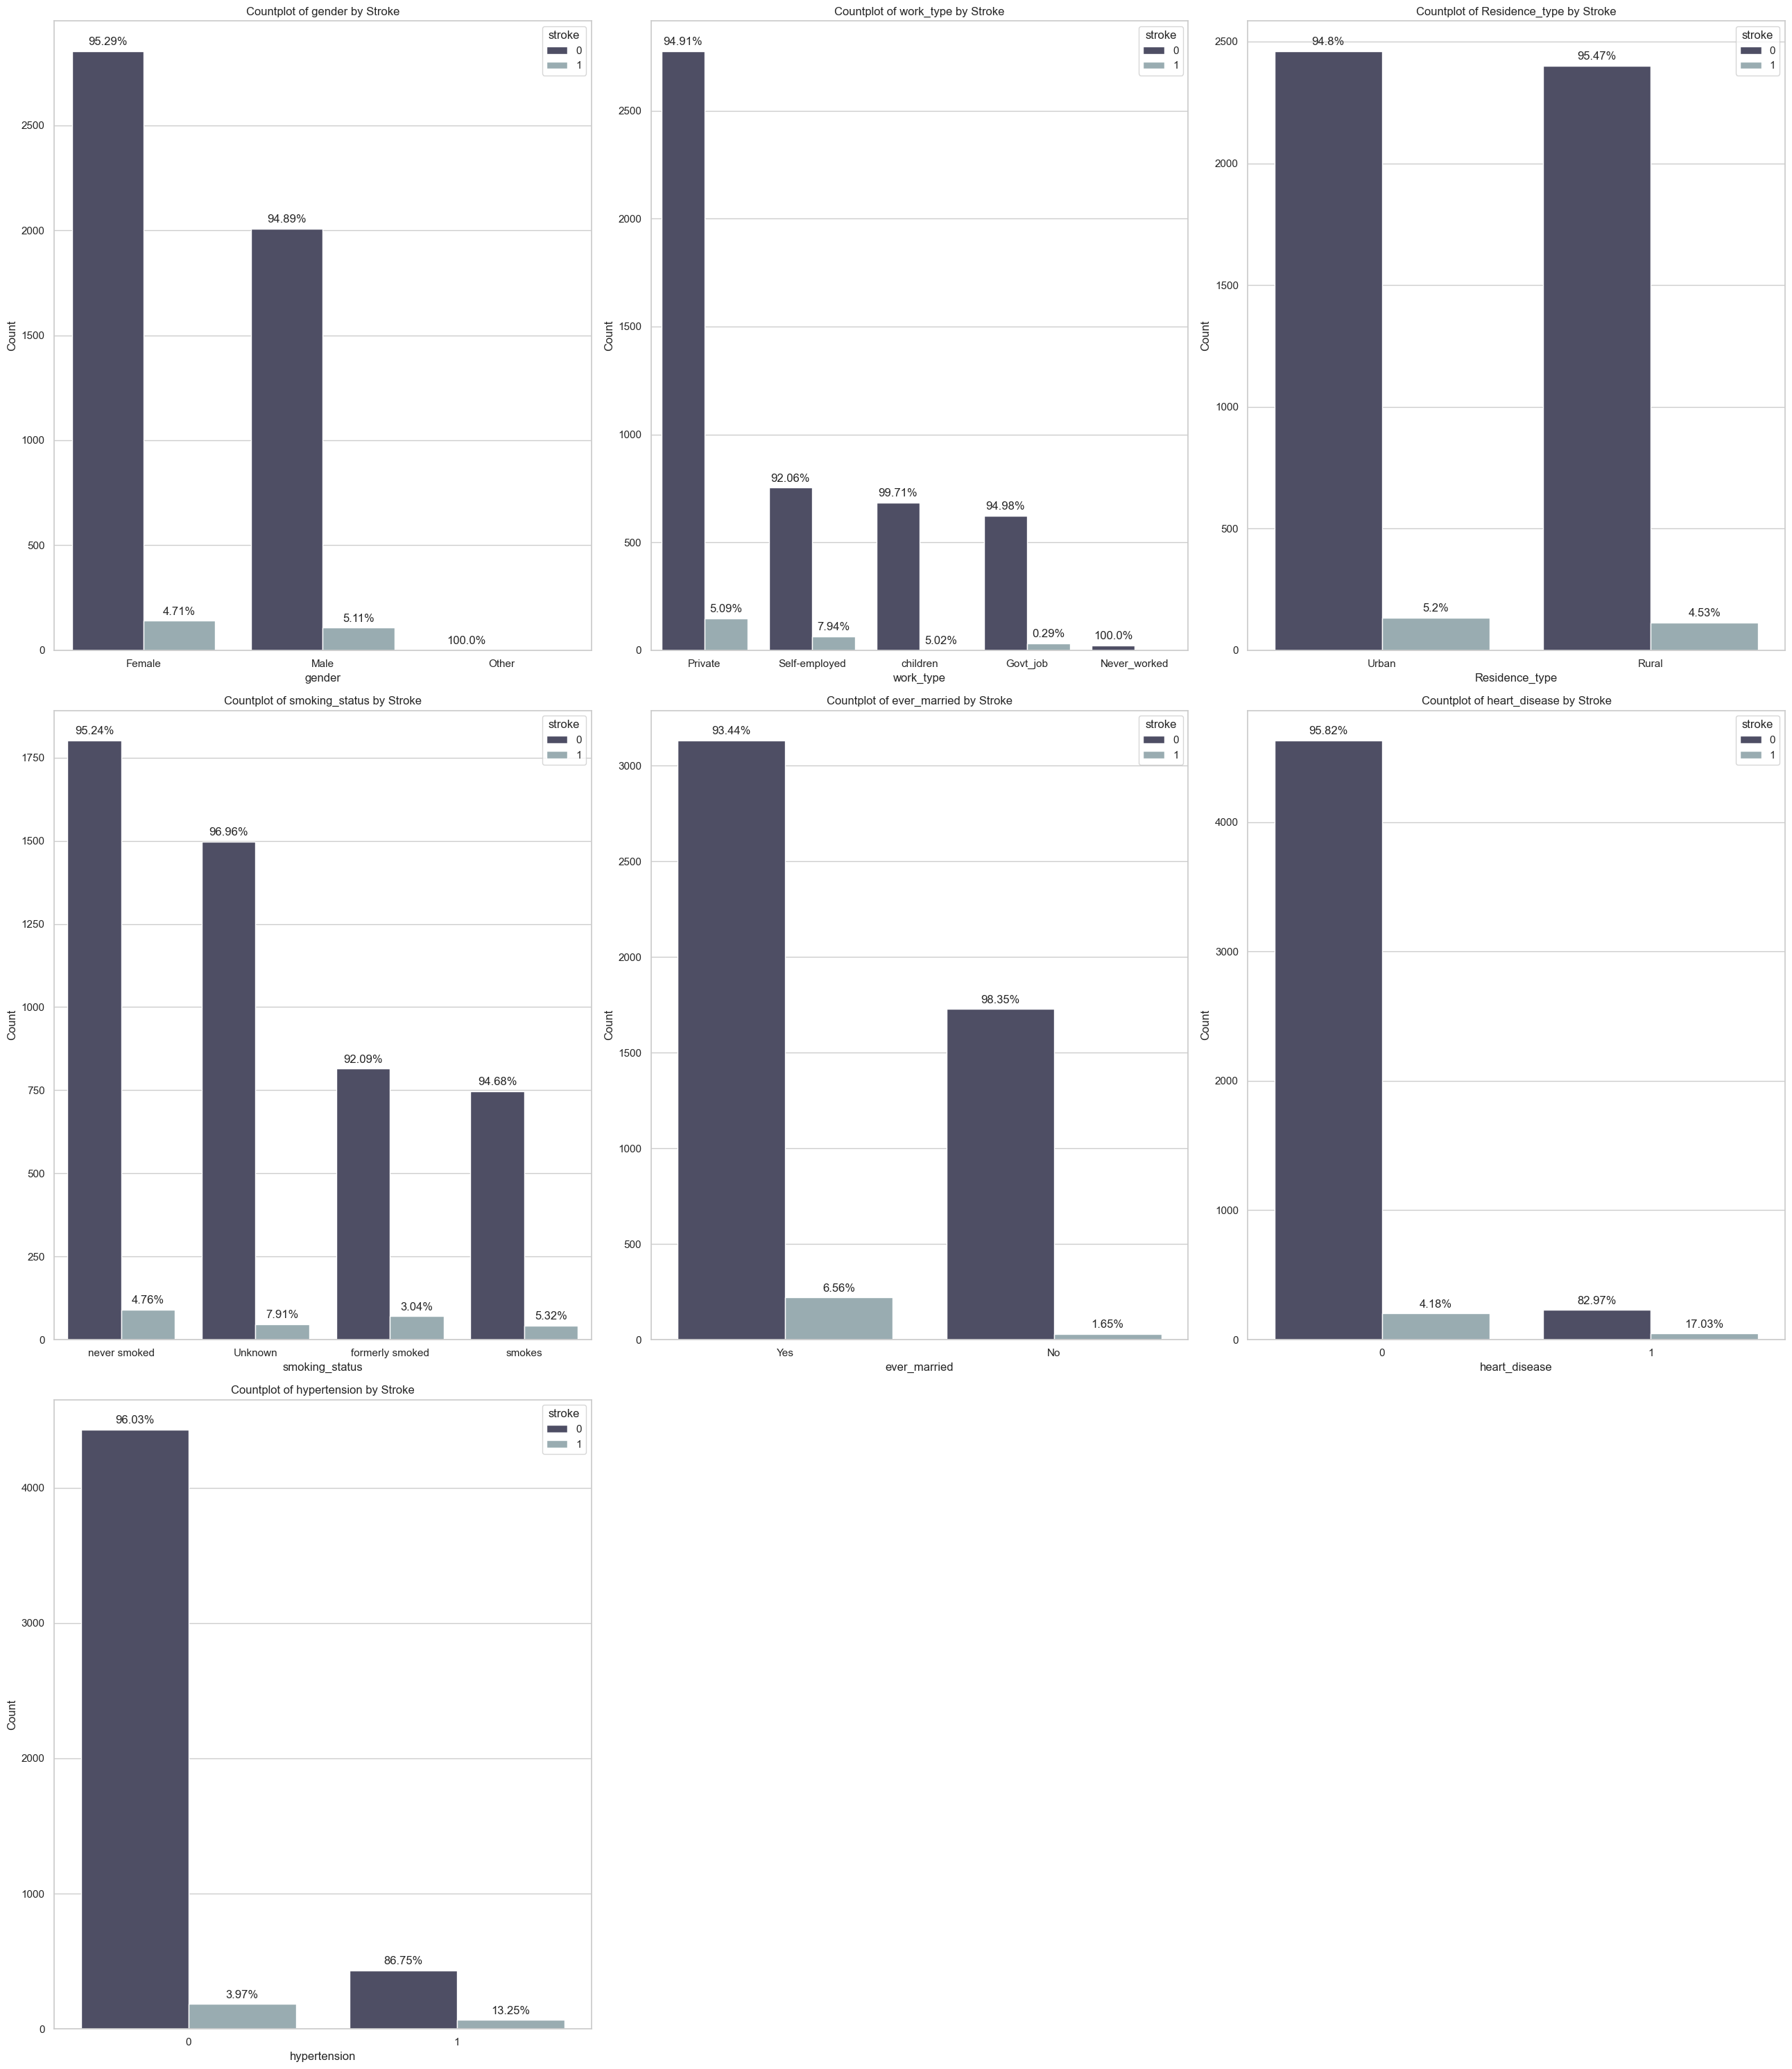

In [18]:
categorical_attrs = ['gender', 'work_type', 'Residence_type', 'smoking_status', 'ever_married', 'heart_disease', 'hypertension']

plt.figure(figsize=(26, 30))
for i in range(len(categorical_attrs)):
    plt.subplot(3, 3, i + 1)

    ax = sns.countplot(data=data, x=categorical_attrs[i], hue='stroke', palette='bone', order=data[categorical_attrs[i]].value_counts().index)

    counts = data.groupby([categorical_attrs[i], 'stroke']).size().reset_index(name='count')

    counts = counts.sort_values(by=['stroke', 'count'], ascending=[True, False])
    total_counts = counts.groupby(categorical_attrs[i])['count'].transform('sum')
    percentages = (counts['count'] / total_counts * 100).round(2)
    percentages = percentages.astype(str) + '%'

    for p, percentage in zip(ax.patches, percentages):
        height = p.get_height()
        x, y = p.get_x() + p.get_width() / 2, height + counts.max()['count'] * 0.01
        ax.annotate(percentage, (x, y), ha='center')

    plt.xlabel(categorical_attrs[i])
    plt.ylabel('Count')
    plt.title(f'Countplot of {categorical_attrs[i]} by Stroke')


plt.tight_layout()
plt.show()

In [19]:
data_numeric = data.select_dtypes(exclude=np.number).columns
label_encoder = LabelEncoder()
for i in data_numeric:
  data[i] = label_encoder.fit_transform(data[i])
print("Encoded data")

Encoded data


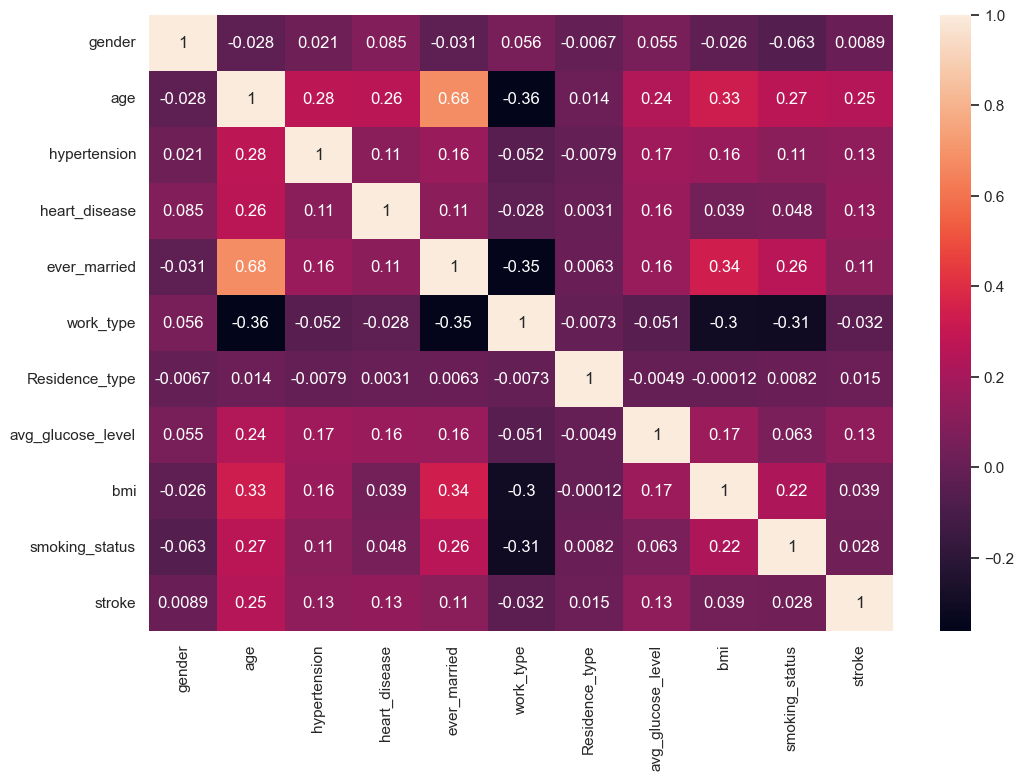

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(data = data.corr(),annot=True)
plt.show()

In [21]:
data

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0                  1             228.69  36.600000               1       1  
1                  0             202.21  28.893237               2       1  
2                  0             105.92  32.500000               2       1  
3                  1             171.23  34.400000               3       1  
4                  0             174.12  24.000000               2       1  
...              ...                ...        ...             ...     ...  
5105               1              83.75  28.893237               2       0  
5106               1             125.20  40.000000               2       0  
5107               0              82.99  30.600000               2       0  
5108               0             166.29  25.600000               1       0  
5109               1              85.28  26.200000               0       0  

[5110 rows x 11 columns]

<Axes: >

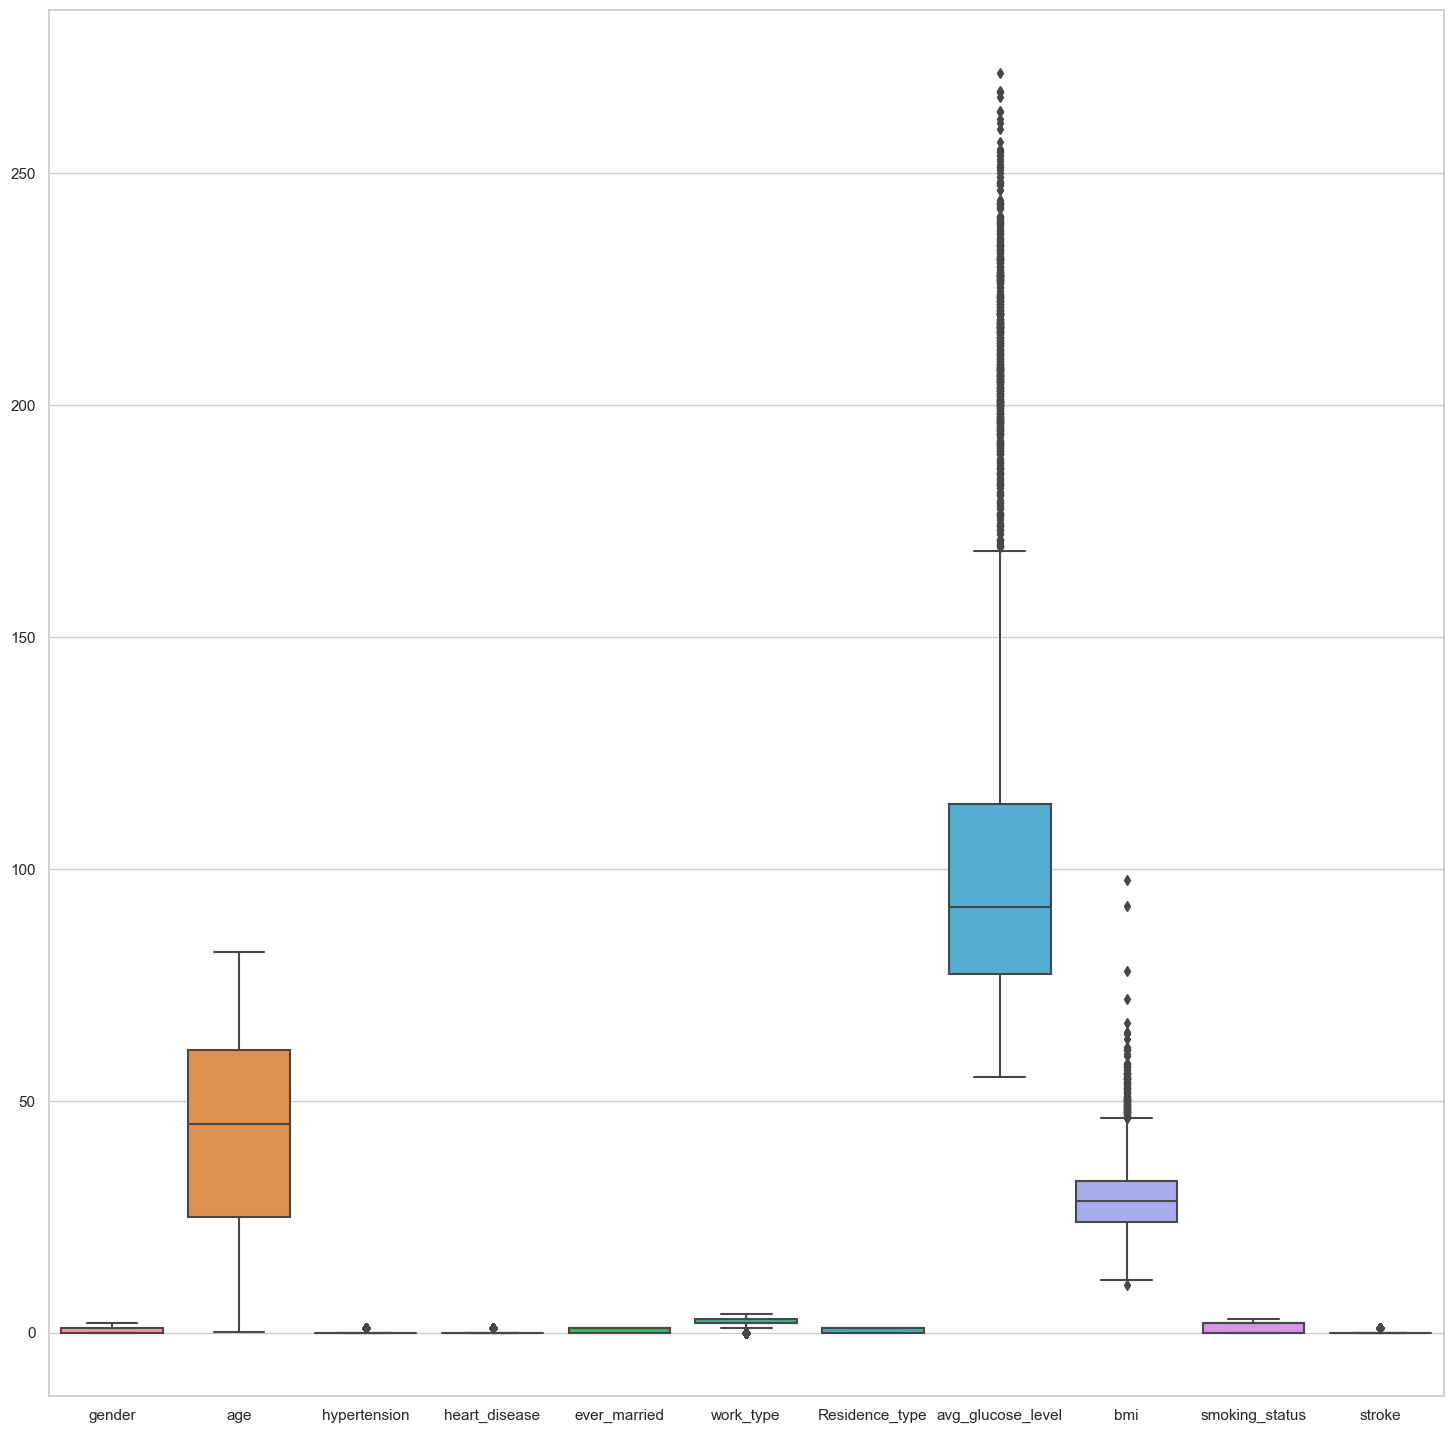

In [22]:
fig,ax = plt.subplots(figsize = (18,18))
sns.boxplot(data =data,ax =ax)

In [23]:
q1_avg_glucose_lever = data['avg_glucose_level'].quantile(0.25)
q3_avg_glucose_lever = data['avg_glucose_level'].quantile(0.75)
iqr_avg_glucose_lever = q3_avg_glucose_lever - q1_avg_glucose_lever
iqr_avg_glucose_lever
q1_bmi = data['bmi'].quantile(0.25)
q3_bmi = data['bmi'].quantile(0.75)
iqr_bmi = q3_bmi - q1_bmi
iqr_bmi

8.999999999999996

In [24]:
df_data_outlier = data[~((data['avg_glucose_level'] < (q1_avg_glucose_lever - 1.5 * iqr_avg_glucose_lever)) |(data['avg_glucose_level'] > (q3_avg_glucose_lever + 1.5 * iqr_avg_glucose_lever)))]
df_data_outlier = df_data_outlier[~((df_data_outlier['bmi'] < (q1_bmi - 1.5 * iqr_bmi)) |(df_data_outlier['bmi'] > (q3_bmi + 1.5 * iqr_bmi)))]
df_data_outlier

gender   age  hypertension  heart_disease  ever_married  work_type  \
2          1  80.0             0              1             1          2   
6          1  74.0             1              1             1          2   
7          0  69.0             0              0             0          2   
8          0  59.0             0              0             1          2   
9          0  78.0             0              0             1          2   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
2                  0             105.92  32.500000               2       1  
6                  0              70.09  27.400000               2       1  
7                  1              94.39  22.800000               2       1  
8                  0              76.15  28.893237               0       1  
9                  1              58.57  24.200000               0       1  
...              ...                ...        ...             ...     ...  
5105               1              83.75  28.893237               2       0  
5106               1             125.20  40.000000               2       0  
5107               0              82.99  30.600000               2       0  
5108               0             166.29  25.600000               1       0  
5109               1              85.28  26.200000               0       0  

[4391 rows x 11 columns]

<Axes: >

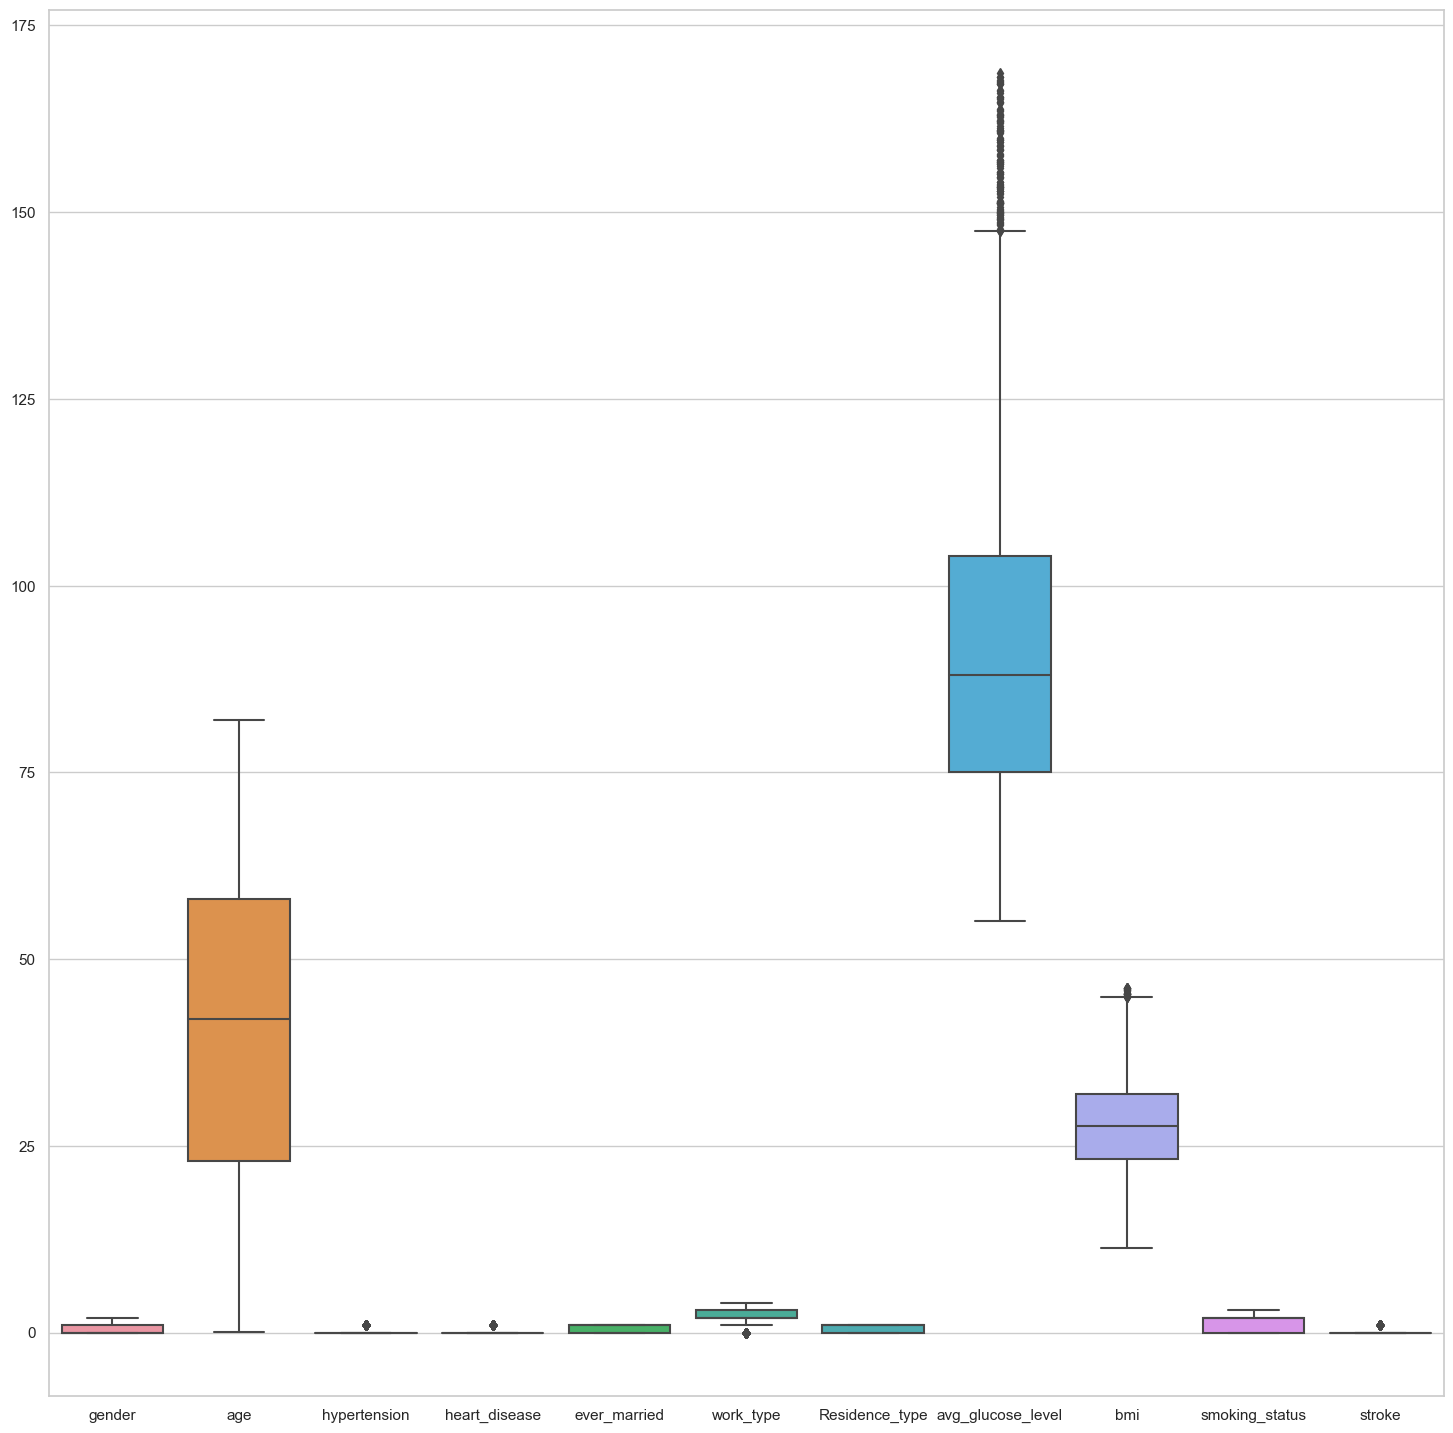

In [25]:
fig,ax = plt.subplots(figsize = (18,18))
sns.boxplot(data =df_data_outlier,ax =ax)

In [26]:
df_data_outlier.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Chia tập dữ liệu

In [27]:
feature = ['gender','age', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type','avg_glucose_level','bmi', 'smoking_status']
X = df_data_outlier[feature]
y = df_data_outlier['stroke']

In [28]:
y.value_counts()

stroke
0    4226
1     165
Name: count, dtype: int64

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)

In [31]:
X_train.shape

(3512, 10)

In [32]:
y_train.shape

(3512,)

In [33]:
X_test

array([[-0.833495  ,  1.42418171, -0.2831904 , ..., -1.12741496,
         0.37927337,  0.60326156],
       [ 1.19751307,  0.00459563, -0.2831904 , ...,  0.56765278,
         0.37927337, -1.24010762],
       [-0.833495  , -0.43902502, -0.2831904 , ..., -0.43102941,
         0.74504357, -1.24010762],
       ...,
       [ 1.19751307,  0.13768183, -0.2831904 , ...,  0.61840331,
         0.56215847,  1.52494615],
       [-0.833495  , -0.57211121, -0.2831904 , ...,  0.24637985,
        -0.70279682, -1.24010762],
       [-0.833495  ,  0.0489577 , -0.2831904 , ..., -0.34320893,
        -1.09904788,  0.60326156]])

In [34]:
y_test.value_counts()

stroke
0    853
1     26
Name: count, dtype: int64

Logistic Regression


In [35]:
logreg = LogisticRegression()

In [36]:
logreg = logreg.fit(X_train, y_train)

In [37]:
logreg.score(X_test, y_test)

0.9704209328782708

In [38]:
y_pred = logreg.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

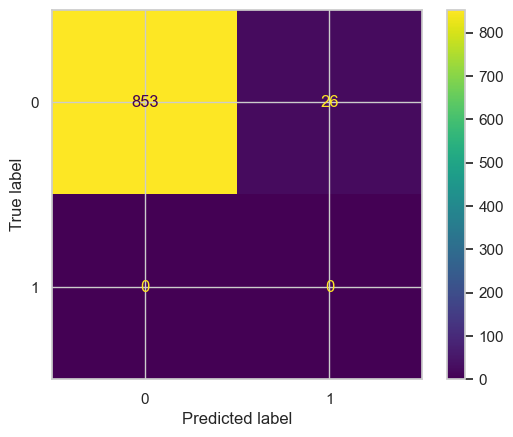

In [39]:
ConfusionMatrixDisplay.from_predictions(y_pred, y_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       853
           1       0.00      0.00      0.00        26

    accuracy                           0.97       879
   macro avg       0.49      0.50      0.49       879
weighted avg       0.94      0.97      0.96       879



C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Decision Tree

In [41]:
reg_model = DecisionTreeClassifier(random_state =0)
reg_model = reg_model.fit(X_train, y_train)

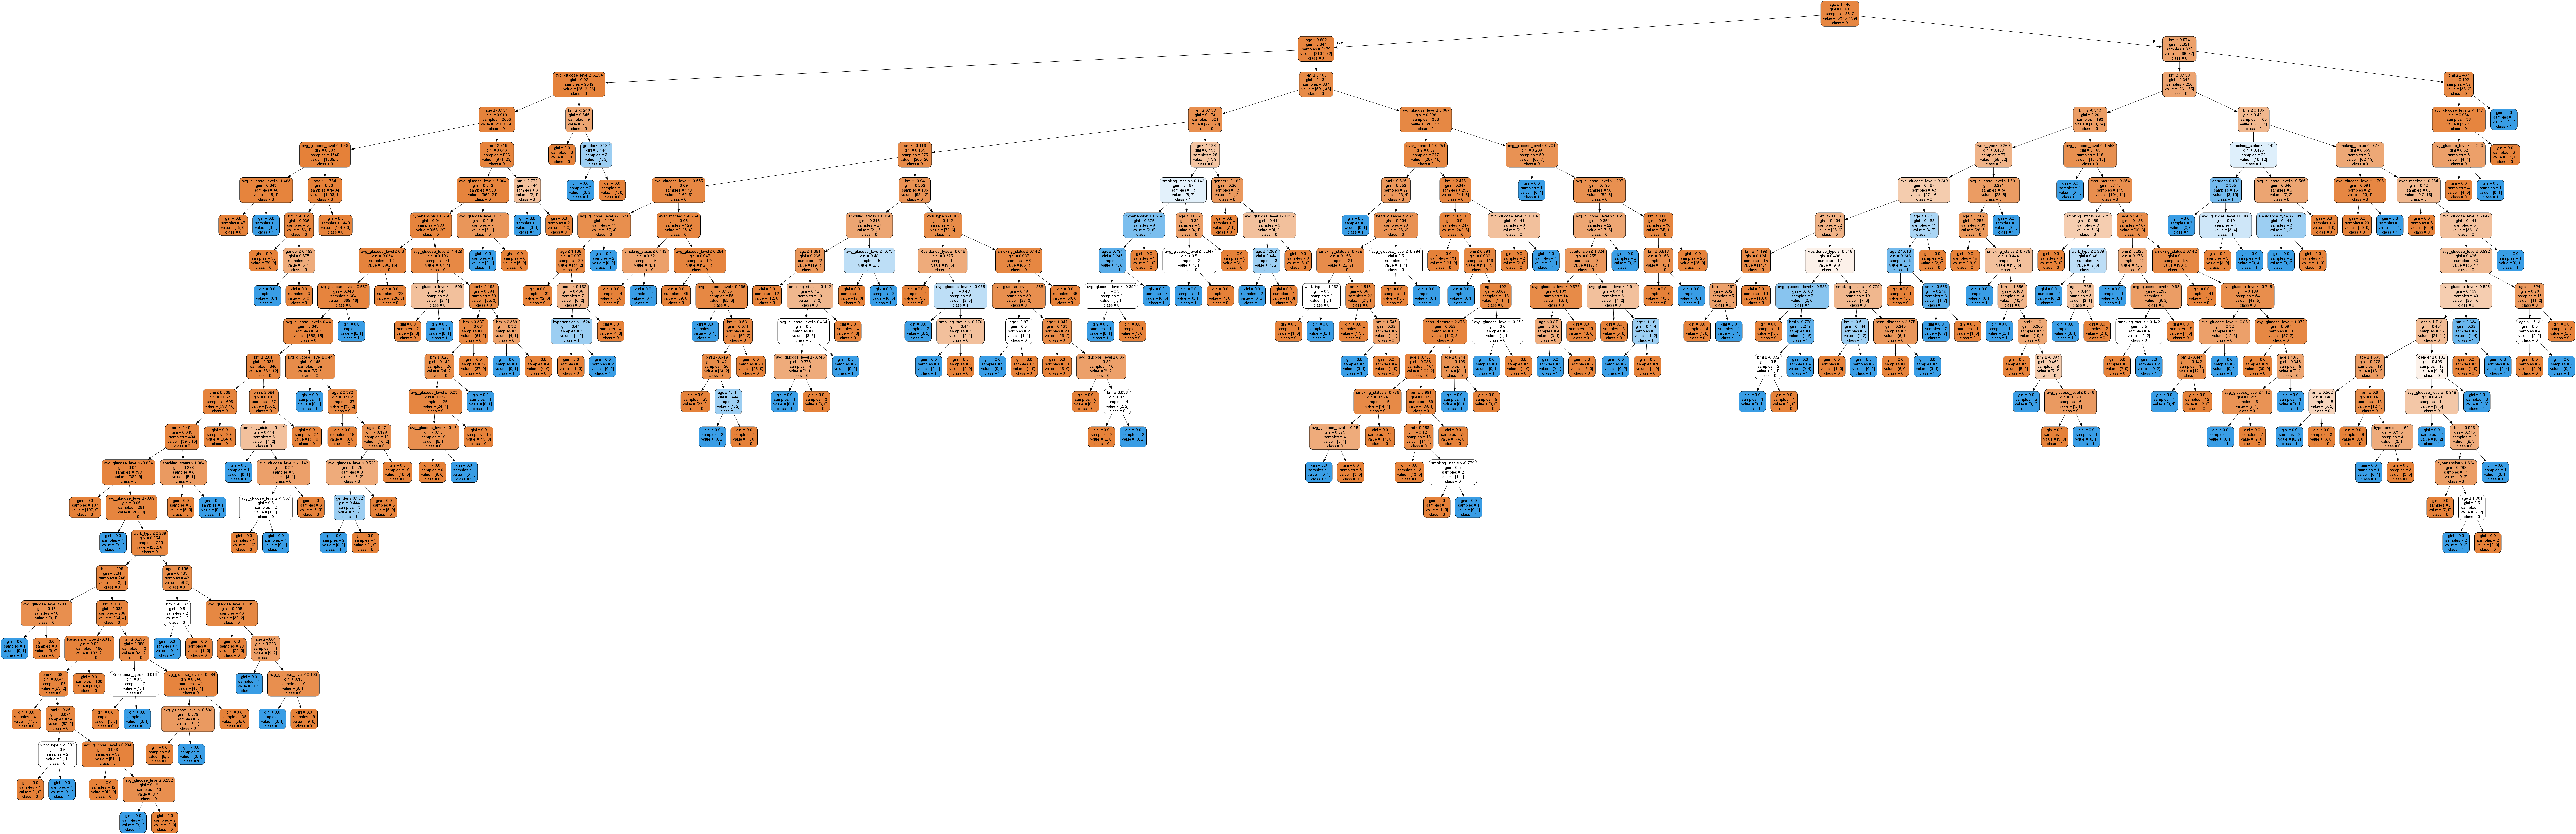

In [42]:

dot_data = export_graphviz(
    reg_model,
    out_file=None,
    feature_names=['gender','age', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type','avg_glucose_level','bmi', 'smoking_status'],
                   class_names=['0', '1'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", cleanup=True, engine="dot", format='png')
Image(filename="iris_decision_tree.png")

In [43]:
y_pred_dst = reg_model.predict(X_test)
y_pred_dst

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

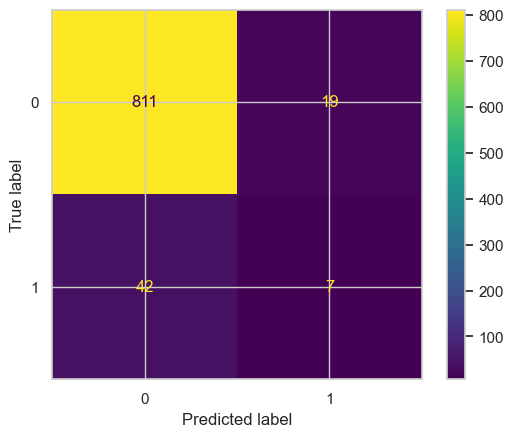

In [44]:
ConfusionMatrixDisplay.from_predictions(y_pred_dst, y_test)

In [45]:
print(classification_report(y_test, y_pred_dst))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       853
           1       0.14      0.27      0.19        26

    accuracy                           0.93       879
   macro avg       0.56      0.61      0.58       879
weighted avg       0.95      0.93      0.94       879



SVC

In [46]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [47]:
svc_model.score(X_test, y_test)

0.9704209328782708

In [48]:
y_pred_SVC = svc_model.predict(X_test)
y_pred_SVC

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

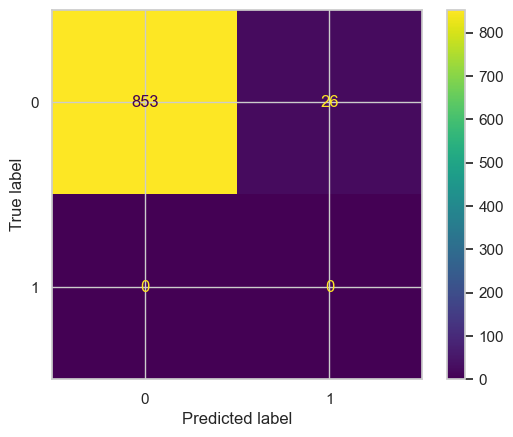

In [49]:
ConfusionMatrixDisplay.from_predictions(y_pred_SVC, y_test)

In [50]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       853
           1       0.00      0.00      0.00        26

    accuracy                           0.97       879
   macro avg       0.49      0.50      0.49       879
weighted avg       0.94      0.97      0.96       879



C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Over sampling

In [51]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 4226), (1, 4226)]


In [52]:
train_x_oversample, test_x_oversample, train_y_oversample, test_y_oversample = train_test_split(X_resampled, y_resampled, test_size = 0.2,random_state=100)

Logistic Regression Oversapling

In [53]:
logreg_over_resample = LogisticRegression()
logreg_over_resample.fit(train_x_oversample, train_y_oversample)

LogisticRegression()

In [54]:
logreg_over_resample.score(test_x_oversample, test_y_oversample)

0.7782377291543465

In [55]:
y_pred_resapled_LGT = logreg_over_resample.predict(test_x_oversample)
y_pred_resapled_LGT

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [56]:
cnf_matrix_LGT = metrics.confusion_matrix(test_y_oversample, y_pred_resapled_LGT)
cnf_matrix_LGT

array([[606, 240],
       [135, 710]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

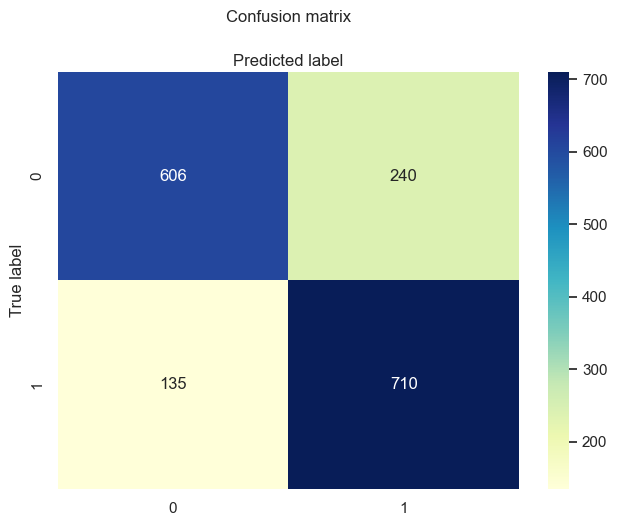

In [57]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_LGT), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [58]:
print(classification_report(test_y_oversample, y_pred_resapled_LGT))

              precision    recall  f1-score   support

           0       0.82      0.72      0.76       846
           1       0.75      0.84      0.79       845

    accuracy                           0.78      1691
   macro avg       0.78      0.78      0.78      1691
weighted avg       0.78      0.78      0.78      1691



In [59]:
train_x_oversample

array([[-0.833495  ,  0.0489577 , -0.2831904 , ..., -0.79908109,
         0.16487669,  1.52494615],
       [ 1.19751307,  0.18204389, -0.2831904 , ..., -1.20640927,
         0.24210954,  0.60326156],
       [ 1.19751307,  0.71438867, -0.2831904 , ..., -0.2284686 ,
         0.59263932, -1.24010762],
       ...,
       [ 1.19751307,  1.64599203, -0.2831904 , ..., -0.59343111,
        -0.59611385, -0.31842303],
       [-0.833495  , -0.0841285 , -0.2831904 , ..., -0.36350914,
        -0.23034364,  0.60326156],
       [-0.833495  ,  1.64599203, -0.2831904 , ..., -1.06739694,
        -0.48943087,  0.60326156]])

In [60]:
from joblib import dump, load

In [61]:
dump(logreg_over_resample,'model.joblib')

['model.joblib']

In [94]:
model_in = load('modelSVC.joblib')
model_in.predict(pd.DataFrame([[1, 20, 0, 0, 0, 1, 0, 60, 30, 2],[0, 55.0, 1, 0, 1, 1, 0, 120.0, 28.0, 1]],columns=feature))


C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:347: InconsistentVersionWarning:

Trying to unpickle estimator SVC from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



array([0, 1], dtype=int64)

SVC Oversampling

In [63]:
SVC_over_resample = SVC()
SVC_over_resample.fit(train_x_oversample, train_y_oversample)

SVC()

In [64]:
SVC_over_resample.score(test_x_oversample, test_y_oversample)

0.8450620934358368

In [65]:
y_pred_resapled_SVC = SVC_over_resample.predict(test_x_oversample)
y_pred_resapled_SVC

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [66]:
cnf_matrix_SVC = metrics.confusion_matrix(test_y_oversample, y_pred_resapled_SVC)
cnf_matrix_SVC

array([[669, 177],
       [ 85, 760]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

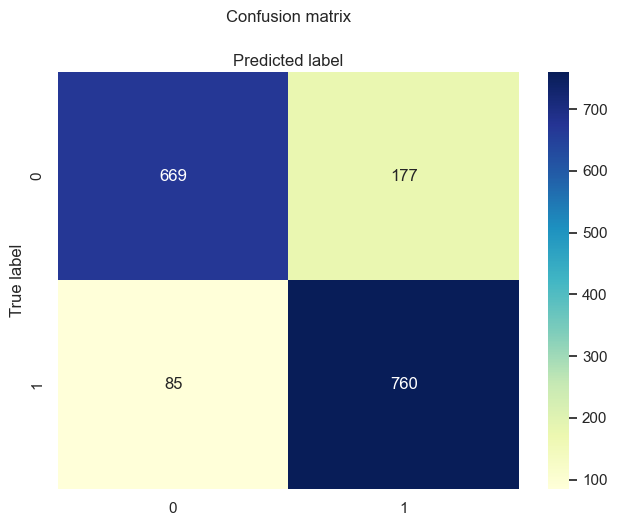

In [67]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_SVC), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [68]:
print(classification_report(test_y_oversample, y_pred_resapled_SVC))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       846
           1       0.81      0.90      0.85       845

    accuracy                           0.85      1691
   macro avg       0.85      0.85      0.84      1691
weighted avg       0.85      0.85      0.84      1691



Dicision Tree Oversampling

In [69]:
DCT_over_resample = DecisionTreeClassifier()
DCT_over_resample.fit(train_x_oversample, train_y_oversample)

DecisionTreeClassifier()

In [70]:
DCT_over_resample.score(test_x_oversample, test_y_oversample)

0.9751626256652868

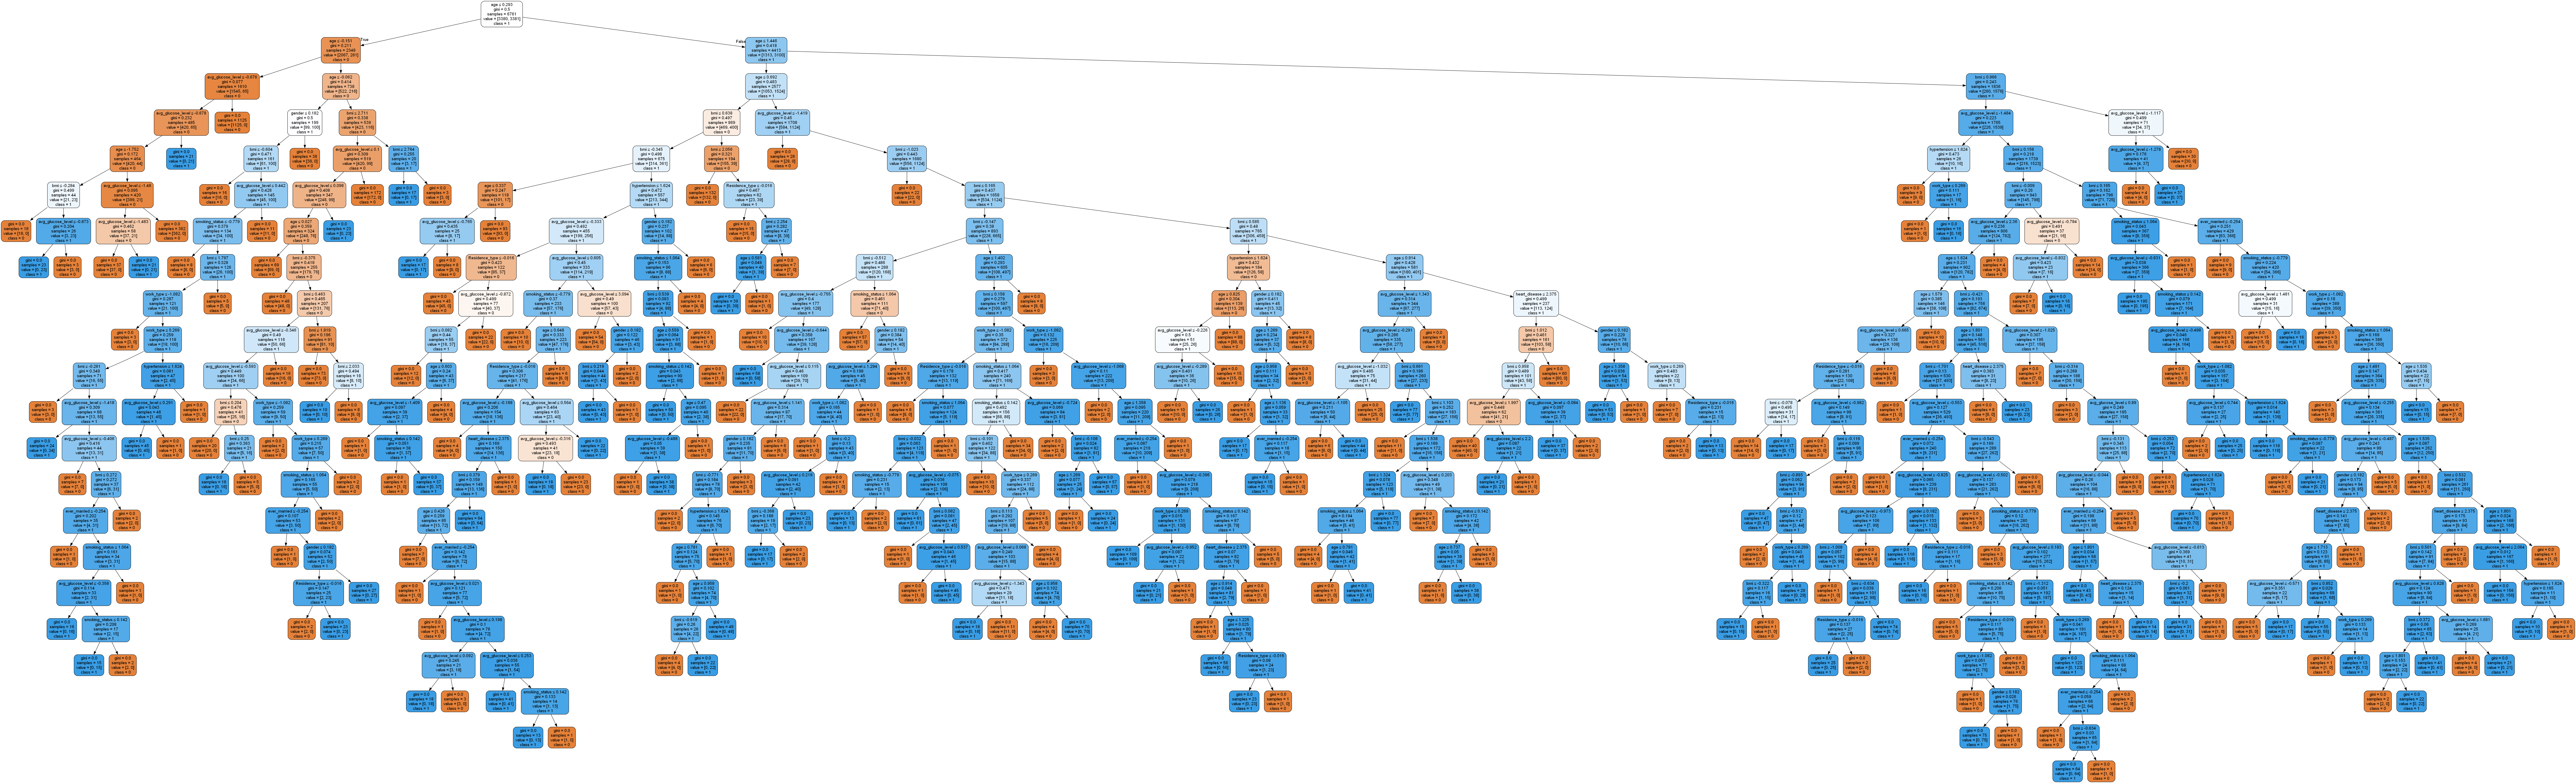

In [71]:
dot_data = export_graphviz(
    DCT_over_resample,
    out_file=None,
    feature_names=['gender','age', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type','avg_glucose_level','bmi', 'smoking_status'],
                   class_names=['0', '1'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", cleanup=True, engine="dot", format='png')
Image(filename="iris_decision_tree.png")

In [72]:
y_pred_resapled_DCT = DCT_over_resample.predict(test_x_oversample)
y_pred_resapled_DCT

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [73]:
cnf_matrix_DCT = metrics.confusion_matrix(test_y_oversample, y_pred_resapled_DCT)
cnf_matrix_DCT

array([[804,  42],
       [  0, 845]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

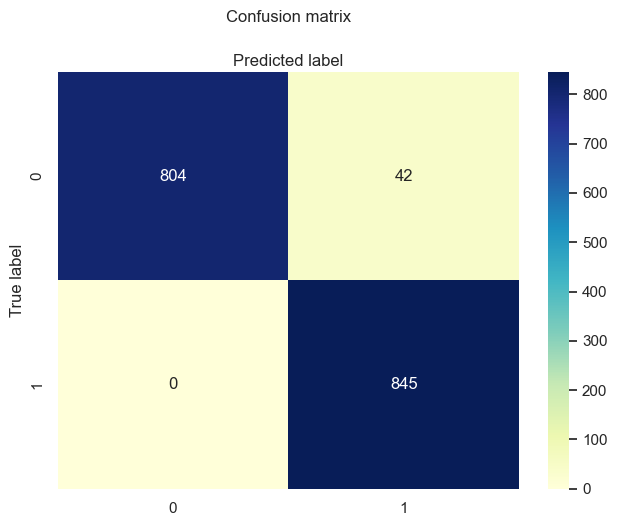

In [74]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_DCT), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [75]:
print(classification_report(test_y_oversample, y_pred_resapled_DCT))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       846
           1       0.95      1.00      0.98       845

    accuracy                           0.98      1691
   macro avg       0.98      0.98      0.98      1691
weighted avg       0.98      0.98      0.98      1691



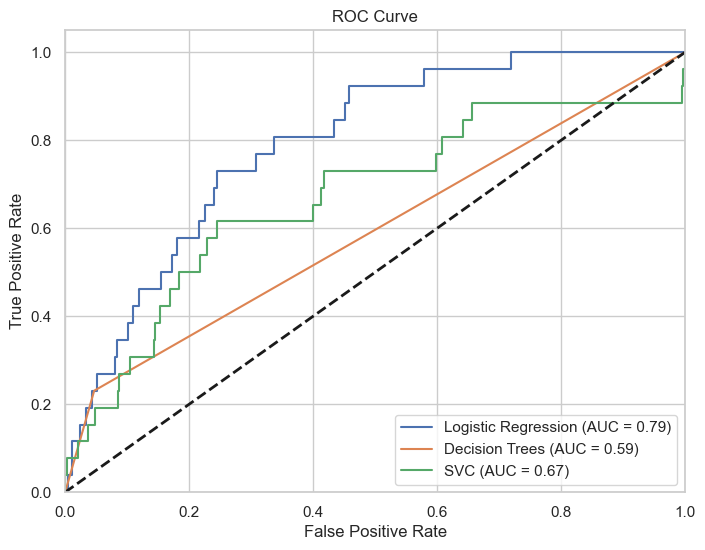

In [76]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Trees': DecisionTreeClassifier(),
    'SVC': SVC(probability=True),
}

plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

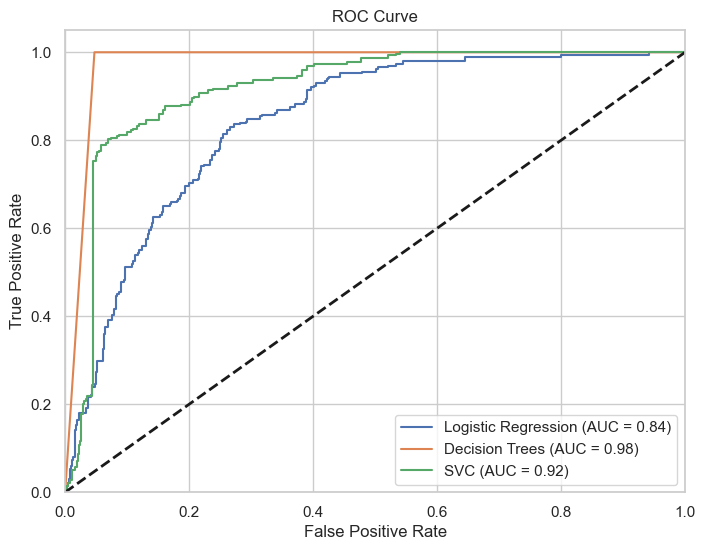

In [77]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Trees': DecisionTreeClassifier(),
    'SVC': SVC(probability=True),
}

plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(train_x_oversample, train_y_oversample)
    y_pred_prob = model.predict_proba(test_x_oversample)[:, 1]
    fpr, tpr, thresholds = roc_curve(test_y_oversample, y_pred_prob)
    roc_auc = roc_auc_score(test_y_oversample, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [78]:
df_data_outlier['work_type'].value_counts()

work_type
2    2482
4     674
3     661
0     552
1      22
Name: count, dtype: int64

In [79]:
data['gender'].value_counts()

gender
0    2994
1    2115
2       1
Name: count, dtype: int64

In [80]:
df_data_outlier['smoking_status'].value_counts()

smoking_status
2    1595
0    1418
1     708
3     670
Name: count, dtype: int64